In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 8.3.3 Illustration: Image de-noising

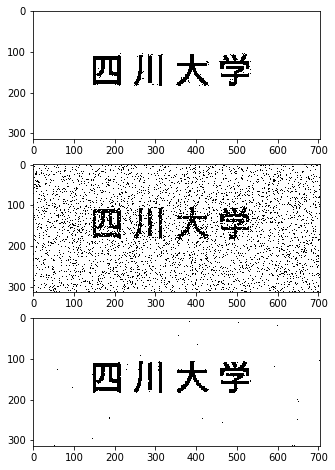

In [9]:
im_path = 'scu.png'
im = mpimg.imread(im_path)
A = np.asarray(im).astype(int)
A.flags.writeable = True
A[A < .5] = -1
A[A >= .5] = 1
bin_im = A
bin_im = bin_im[:,:,1]

noise_im = bin_im.copy()
for i in range(bin_im.shape[0]):
    for j in range(bin_im.shape[1]):
        r = np.random.rand()
        if r < .1:
            noise_im[i][j] = -noise_im[i][j]
            
alpha = 8
beta = 10
m, n = noise_im.shape
denoise_im = noise_im.copy()
max_iter = 10 * m * n
for iteration in range(max_iter):
    i = np.random.randint(m)
    j = np.random.randint(n)
    
    result = alpha * noise_im[i][j]
    try:
        result += beta * denoise_im[i-1][j]
        result += beta * denoise_im[i+1][j]
        result += beta * denoise_im[i][j-1]
        result += beta * denoise_im[i][j+1]
    except IndexError:
        result += 0
    denoise_im[i][j] = np.sign(result)
    
plt.figure(figsize=[15,8])
plt.subplot(3,1,1)
plt.imshow(bin_im, cmap='gray')
plt.subplot(3,1,2)
plt.imshow(noise_im, cmap='gray')
plt.subplot(3,1,3)
plt.imshow(denoise_im, cmap='gray')